TODO 
- insincerce distribution 
- word distribution 
- sentences components: number of words, number of punctuations, number of entity, 
    number of upper words, number of sensitive words, ending punnctuations 
- Explore 4 types of word embedding 

In [18]:
project_path = '/Users/xiangli/Desktop/Embedding'
import os 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from data.preprocess_util import * 
import itertools 
import collections 
%matplotlib inline

In [3]:
train = pd.read_csv('{}/data/quora/train.csv'.format(project_path))
train.head() 

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


## Overall Distribution

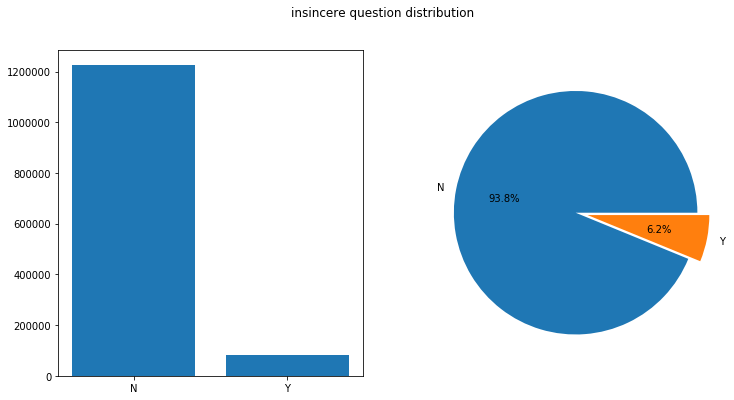

In [68]:
stat = train.groupby('target').agg({'qid':'count'})
fig, axe = plt.subplots(nrows = 1, ncols=2, figsize = (12,6))
axe[0].bar(x = ['N','Y'] , height = stat.qid)
axe[1].pie(x = stat.qid/stat.qid.sum(), labels= ['N','Y'],
           explode = (0, 0.1), autopct='%1.1f%%')
fig.suptitle('insincere question distribution')
plt.show()

## Word distribution 

In [10]:
sentences = train['question_text'].values
preprocess = StrUtils('{}/const/en'.format(project_path))
sentences = preprocess.preprocess(sentences)
sentences = preprocess.word_cut(sentences)

  0%|          | 0/1306122 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/zz/3m9l2x6x6_q_g1f_qcwjqqw80000gp/T/jieba.cache
Loading model cost 0.781 seconds.
Prefix dict has been built successfully.
100%|██████████| 1306122/1306122 [54:07<00:00, 402.16it/s] 


In [71]:
def build_vocab(sentences):
    vocab = collections.Countera() 
    for i in sentences:
        vocab.update(i)
    return vocab 

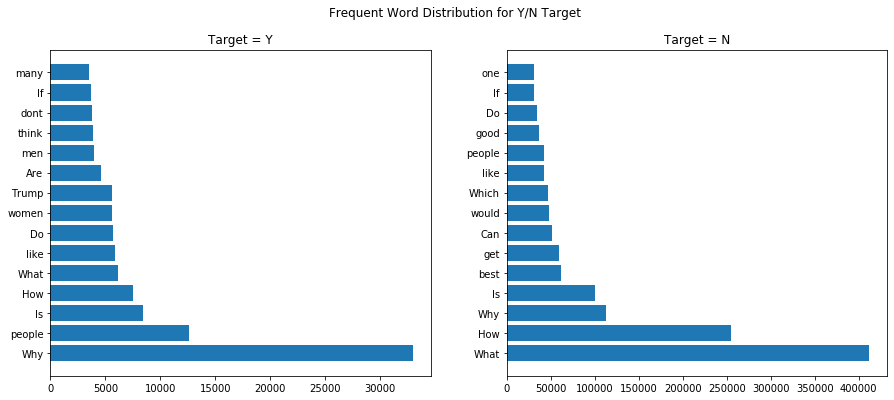

In [87]:
sentences = np.array(sentences)
Filter = train['target']==1
vocab_y = build_vocab(sentences[Filter])
vocab_n = build_vocab(sentences[~Filter])

fig, axe = plt.subplots(nrows = 1, ncols=2, figsize = (15,6),)
axe[0].barh(y =[i for i,j in vocab_y.most_common(15)],
            width = [j for i,j in vocab_y.most_common(15)])
axe[1].barh(y =[i for i,j in vocab_n.most_common(15)], 
            width = [j for i,j in vocab_n.most_common(15)])
axe[0].set_title('Target = Y')
axe[1].set_title('Target = N')
fig.suptitle('Frequent Word Distribution for Y/N Target')
plt.show()

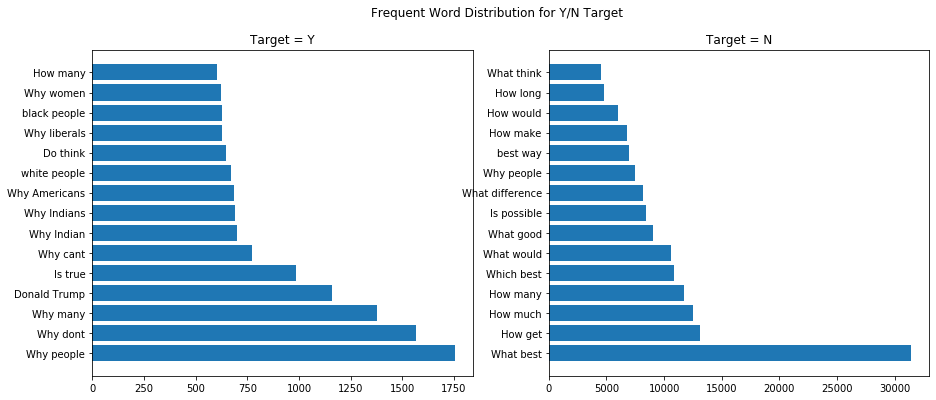

In [97]:
sentences = preprocess.make_ngram(ngram = 2, sentences = sentences)
sentences = np.array(sentences)
Filter = train['target']==1
vocab_y = build_vocab(sentences[Filter])
vocab_n = build_vocab(sentences[~Filter])

fig, axe = plt.subplots(nrows = 1, ncols=2, figsize = (15,6),)
axe[0].barh(y =[i for i,j in vocab_y.most_common(15)], width = [j for i,j in vocab_y.most_common(15)])
axe[1].barh(y =[i for i,j in vocab_n.most_common(15)], width = [j for i,j in vocab_n.most_common(15)])
axe[0].set_title('Target = Y')
axe[1].set_title('Target = N')
fig.suptitle('Frequent Word Distribution for Y/N Target')
plt.show()

## Sentences component 

In [114]:
f_word = [len(sen) for sen in sentences]
f_char = [len(sen) for sen in train['question_text'].values]
f_puncts = [len(preprocess.re_puncts.findall(sen)) for sen in train['question_text'].values]
f_stopwords = [len([i in preprocess.stop_words for i in sen.lower().split()]) 
               for sen in train['question_text'].values]

In [156]:
r_puncts = np.array(f_puncts)/np.array(f_char)
r_stopwords = np.array(f_puncts)/np.array(f_char)

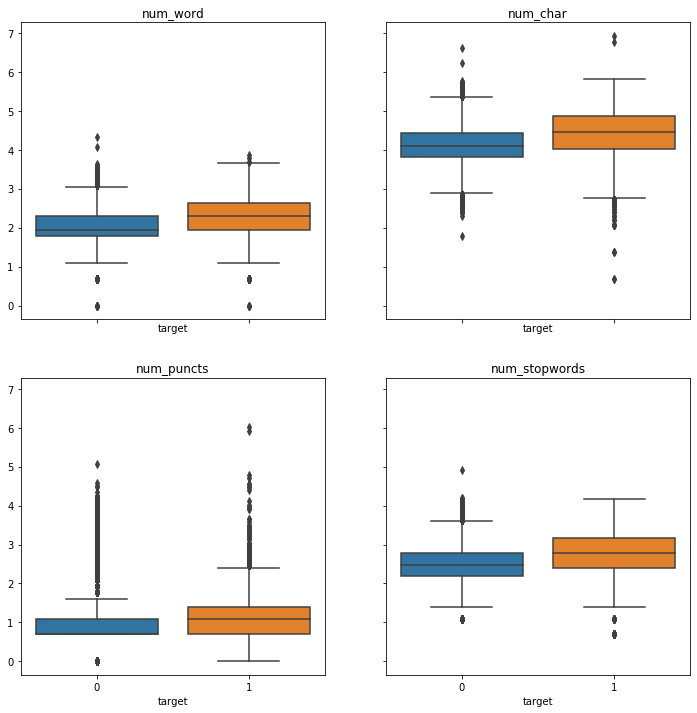

In [152]:
name = ['num_word','num_char','num_puncts','num_stopwords']
fig, axe = plt.subplots(nrows=2, ncols=2, sharex = True, sharey =True, figsize = (12,12))
for i, feature in enumerate([f_word, f_char, f_puncts, f_stopwords]) :
    sns.boxplot(x= train['target'], y = np.log1p(feature), ax =axe[i//2][i%2]) 
    axe[i//2][i%2].set_title(name[i])
plt.show() 

/Users/xiangli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/xiangli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


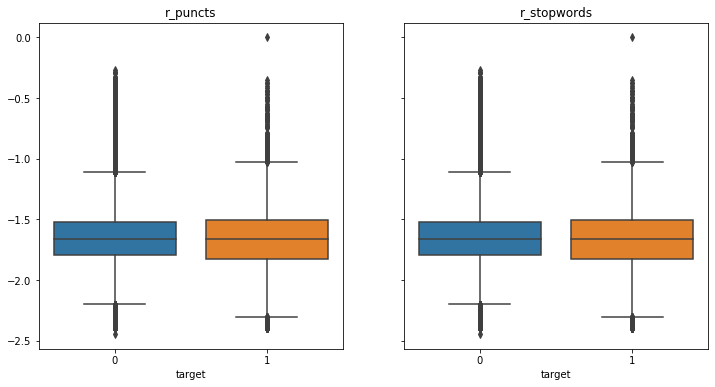

In [160]:
name = ['r_puncts','r_stopwords']
fig, axe = plt.subplots(nrows=1, ncols=2, sharex = True, sharey =True, figsize = (12,6))
for i, feature in enumerate([r_puncts, r_stopwords]) :
    sns.boxplot(x= train['target'], y = np.log10(feature), ax =axe[i]) 
    axe[i].set_title(name[i])
plt.show() 

## Reference 

- https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc
- https://www.kaggle.com/theoviel/improve-your-score-with-some-text-preprocessing
- 